In [1]:
import numpy as np, matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.special import comb as C
acc_score = od()

In [2]:
def get_entropy_from_culling_factor(c):
    S = od({1: 0})
    for E in range(0, -len(c) + 2, -1):
        S[E] = S[E + 1] + np.log(1 - c[E + 1])
    for E in range(0, -len(c) + 2, -1):
        S[E] += np.log(c[E])
    return S
def get_DOS_from_entropy(S):
    g = od()
    Z = 0
    for E, s in S.items():
        t = np.exp(s)
        if t > 0 and E <= -200:
            g[E] = t
            Z += t
    timex = g[-200]
    for E in g:
        g[E] /= timex
    return g

def get_DOS(N):
    DOS = od()
    Z = 0
    for k in range(200, 401, 2):
        DOS[-k] = C(N, k)
        Z += C(N, k)
    timex = DOS[-200]
    for k in range(200, 401, 2):
        DOS[-k] /= timex
    return DOS

In [3]:
for nSteps in [10]:
    name = "./datasets/1DIsing_N400_R1048576_nSteps{}_run0X.txt".format(nSteps)
    culling_factor = od()
    culling_factor[1] = 0
    culling_factor[0] = 0
    N = int(name.split("_N")[1].split("_R")[0])
    R = int(name.split("_R")[1].split("_nSteps")[0])
    print(N, R, nSteps)
    with open(name) as f:
        for line in f:
            E, c = map(float, line.split())
            culling_factor[E] = c
    culling_factor[-400] = 1.0
    
    DOS = get_DOS(N)
    
    S = get_entropy_from_culling_factor(culling_factor)
    g = get_DOS_from_entropy(S)
    
    #plt.figure(figsize=(16, 9))
    #plt.plot([E for E in g], [np.log(g[E]) for E in g], 'o', label="Machta nSteps={}".format(nSteps))
    #plt.plot([E for E in DOS], [np.log(DOS[E]) for E in DOS], label=" normed C(N-1, k)".format(N))

    #plt.yscale("log DOS")
    #plt.ylabel("log")
    #plt.legend()
    #plt.grid()
    #plt.show()
#    acc = sum([np.log(DOS[E]) - np.log(g[E]) for E in g])
#    acc_score[nSteps] = acc


400 1048576 10


C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


No handles with labels found to put in legend.


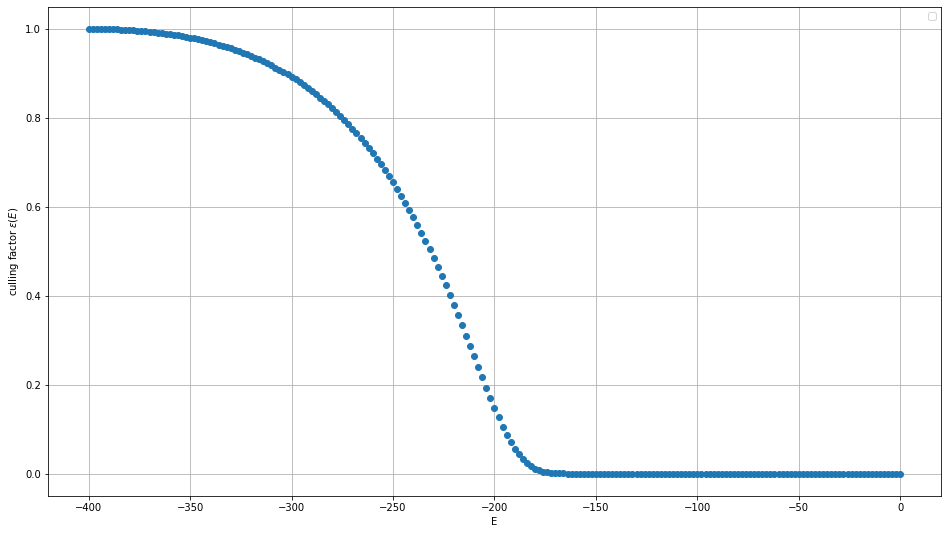

In [4]:
plt.figure(figsize=(16, 9))
threshold = -200
plt.plot([E for E in culling_factor if E % 2 == 0], [c for E, c in culling_factor.items() if E % 2 == 0], 'o')

plt.ylabel("culling factor $\epsilon(E)$")
plt.xlabel("E")
#plt.yscale("log")
plt.legend()
plt.grid()
plt.savefig("culling_factor_N400_R1048576.png")

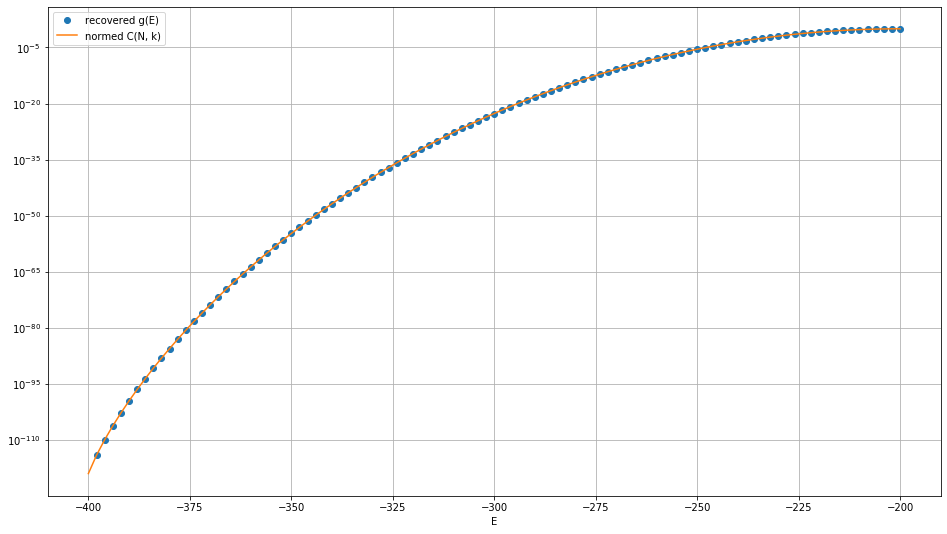

In [5]:
plt.figure(figsize=(16, 9))
threshold = -200
plt.plot([E for E in g if E <= threshold], [g[E] for E in g if E <= threshold], 'o', label="recovered g(E)")
plt.plot([E for E in DOS if E <= threshold], [DOS[E] for E in DOS if E <= threshold], label="normed C(N, k)".format(N))

#plt.ylabel("log DOS")
plt.yscale("log")
plt.xlabel("E")
plt.legend()
plt.grid()
plt.savefig("recoveredDOS_N400_R1048576.png")

C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


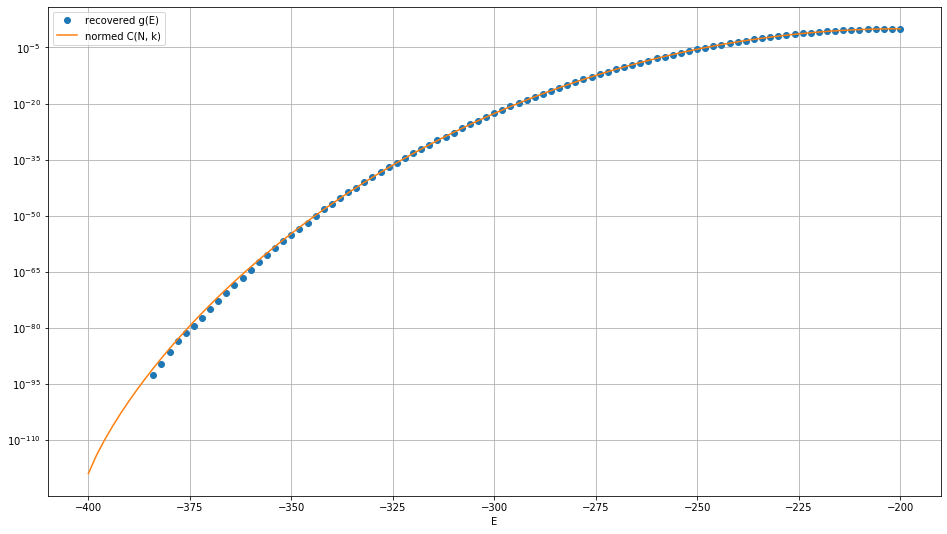

In [6]:
R=1024
nSteps=1
seed=0
name = "./datasets/1DIsing_N400_R{}_nSteps{}_run{}X.txt".format(R, nSteps, seed)
culling_factor = od()
culling_factor[1] = 0
culling_factor[0] = 0
N = int(name.split("_N")[1].split("_R")[0])
#        R = int(name.split("_R")[1].split("_nSteps")[0])
#print(N, R, nSteps, seed)
with open(name) as f:
    for line in f:
        E, c = map(float, line.split())
        culling_factor[E] = c
culling_factor[-400] = 1.0

DOS = get_DOS(N)

S = get_entropy_from_culling_factor(culling_factor)
g = get_DOS_from_entropy(S)

#plt.figure(figsize=(16, 9))
#plt.plot([E for E in g], [np.log(g[E]) for E in g], 'o', label="Machta nSteps={}".format(nSteps))
#plt.plot([E for E in DOS], [np.log(DOS[E]) for E in DOS], label=" normed C(N-1, k)".format(N))

#plt.yscale("log DOS")
#plt.ylabel("log")
#plt.legend()
#plt.grid()
#plt.show()

plt.figure(figsize=(16, 9))
threshold = -200
plt.plot([E for E in g if E <= threshold], [g[E] for E in g if E <= threshold], 'o', label="recovered g(E)")
plt.plot([E for E in DOS if E <= threshold], [DOS[E] for E in DOS if E <= threshold], label="normed C(N, k)".format(N))

#plt.ylabel("log DOS")
plt.yscale("log")
plt.xlabel("E")
plt.legend()
plt.grid()
plt.show()

R movement

In [7]:
acc_score = od()
last_point = od()
for nSteps in [1, 2, 5, 10, 30, 50]:
    for seed in [0]:
        for R in [1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:#, 4190208, 8388608]: 
            try:
                name = "./datasets/1DIsing_N400_R{}_nSteps{}_run{}X.txt".format(R, nSteps, seed)
                culling_factor = od()
                culling_factor[1] = 0
                culling_factor[0] = 0
                N = int(name.split("_N")[1].split("_R")[0])
        #        R = int(name.split("_R")[1].split("_nSteps")[0])
                #print(N, R, nSteps, seed)
                with open(name) as f:
                    for line in f:
                        E, c = map(float, line.split())
                        culling_factor[E] = c
                culling_factor[-400] = 1.0

                DOS = get_DOS(N)

                S = get_entropy_from_culling_factor(culling_factor)
                g = get_DOS_from_entropy(S)

                #plt.figure(figsize=(16, 9))
                #plt.plot([E for E in g], [np.log(g[E]) for E in g], 'o', label="Machta nSteps={}".format(nSteps))
                #plt.plot([E for E in DOS], [np.log(DOS[E]) for E in DOS], label=" normed C(N-1, k)".format(N))

                #plt.yscale("log DOS")
                #plt.ylabel("log")
                #plt.legend()
                #plt.grid()
                #plt.show()
                acc = sum([abs(np.log(DOS[E]) - np.log(g[E])) for E in g])
                acc_score[(R, seed, nSteps)] = acc
                last_point[(R, seed, nSteps)] = -N in g and not np.isnan(g[-N])
            except:
                pass

C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


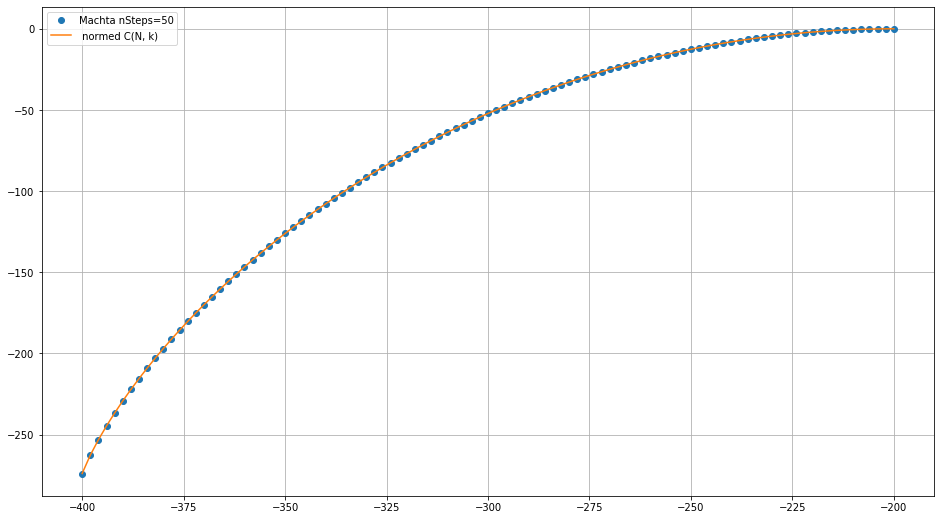

In [8]:
plt.figure(figsize=(16, 9))
threshold = -200
plt.plot([E for E in g if E <= threshold], [np.log(g[E]) for E in g if E <= threshold], 'o', label="Machta nSteps={}".format(nSteps))
plt.plot([E for E in DOS if E <= threshold], [np.log(DOS[E]) for E in DOS if E <= threshold], label=" normed C(N, k)".format(N))

#plt.ylabel("log DOS")
#plt.yscale("log")
plt.legend()
plt.grid()
plt.show()
#acc_score

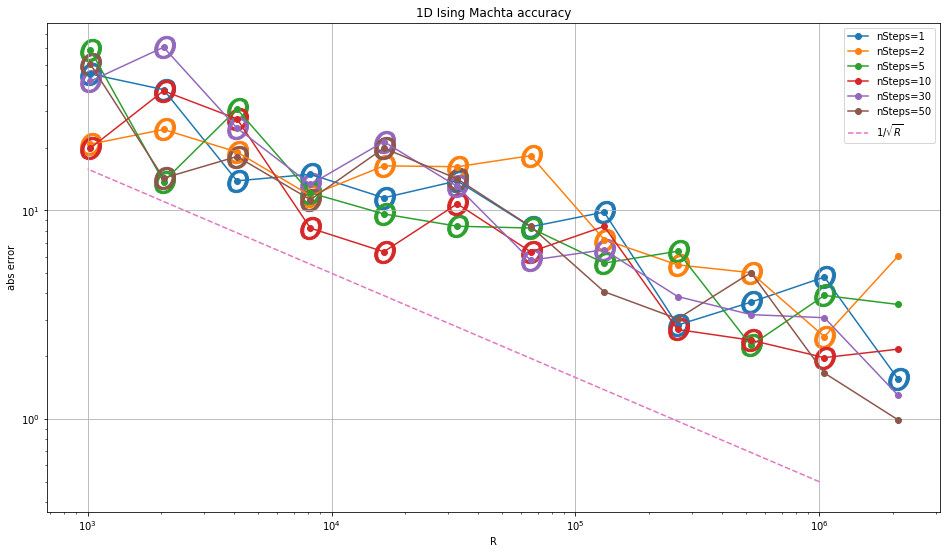

In [24]:
plt.figure(figsize=(16, 9))
for z in [1, 2, 5, 10, 30, 50]:
    plt.plot([R for R, seed, nSteps in acc_score if nSteps == z], [acc_score[(R, seed, nSteps)] for R, seed, nSteps in acc_score
        if nSteps == z], 'o-', label="nSteps={}".format(z))
    #optional
    plt.scatter([R for R, seed, nSteps in acc_score if nSteps == z and not last_point[(R, seed, nSteps)]],
                 [acc_score[(R, seed, nSteps)] for R, seed, nSteps in acc_score
        if nSteps == z and not last_point[(R, seed, nSteps)]], s=500, marker='$O$')

    
x = [1000000, 1000]
plt.plot(x, [500/np.sqrt(y) for y in x], '--', label="$1/\sqrt{R}$")

plt.title("1D Ising Machta accuracy")
plt.legend()
plt.ylabel("abs error")
plt.xlabel("R")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.savefig("1DisingMachtaAccuracy.png", bbox_inches='tight')